In [ ]:
import pandas as pd
from tensorflow.keras import layers, models, optimizers
from keras.models import Sequential
from tensorflow.keras.layers import Dropout
from keras.layers import LSTM, Dense, Flatten
from tensorflow.keras.losses import MeanSquaredError
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from os.path import exists
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/csv/Flt_Dl.csv")
df

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0,0,300
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0,0,596
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0,0,229
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0,0,223
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0,0,579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1,2,OH,20397,OH,N594NN,5125,11057,1105703,CLT,...,1232305,ILM,1428.0,0.0,1400-1459,1524.0,0.0,0,0,185
995,1,2,OH,20397,OH,N594NN,5125,12323,1232305,ILM,...,1105703,CLT,1555.0,0.0,1600-1659,1720.0,0.0,0,0,185
996,1,2,OH,20397,OH,N256PS,5128,11278,1127805,DCA,...,1219702,HPN,1659.0,0.0,1700-1759,1804.0,0.0,0,0,234
997,1,2,OH,20397,OH,N256PS,5128,12197,1219702,HPN,...,1105703,CLT,1850.0,0.0,1800-1859,2050.0,0.0,0,0,564


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(999, 21)

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_UNIQUE_CARRIER        0
OP_CARRIER_AIRLINE_ID    0
OP_CARRIER               0
TAIL_NUM                 0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST_AIRPORT_SEQ_ID      0
DEST                     0
DEP_TIME                 2
DEP_DEL15                2
DEP_TIME_BLK             0
ARR_TIME                 3
ARR_DEL15                3
CANCELLED                0
DIVERTED                 0
DISTANCE                 0
dtype: int64

In [ ]:
df = df[["DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST","ARR_DEL15","DEP_TIME"]]
df.isnull().sum()

DAY_OF_MONTH    0
DAY_OF_WEEK     0
ORIGIN          0
DEST            0
ARR_DEL15       3
DEP_TIME        2
dtype: int64

In [ ]:
df[df.isnull().values.any(axis=1)].head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,ARR_DEL15,DEP_TIME
397,1,2,PBI,ORD,NaN,NaN
403,1,2,EGE,DFW,NaN,NaN
971,1,2,CLT,PNS,NaN,1953.0


In [ ]:
# let's use the fillna method to replace the missing values with 1s.
df = df.fillna({'ARR_DEL15': 1})
df.iloc[177:185]

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,ARR_DEL15,DEP_TIME
177,1,2,ATL,OAJ,0.0,1225.0
178,1,2,OAJ,ATL,0.0,1430.0
179,1,2,ATL,TLH,0.0,1615.0
180,1,2,LGA,CVG,0.0,958.0
181,1,2,CLE,DTW,0.0,1748.0
182,1,2,DTW,CLE,1.0,1545.0
183,1,2,AEX,ATL,0.0,1732.0
184,1,2,AEX,ATL,0.0,1030.0


In [ ]:
# let's use the fillna method to replace the missing values with 1s.
df = df.fillna({'DEP_TIME': 1})
df.iloc[177:185]

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,ARR_DEL15,DEP_TIME
177,1,2,ATL,OAJ,0.0,1225.0
178,1,2,OAJ,ATL,0.0,1430.0
179,1,2,ATL,TLH,0.0,1615.0
180,1,2,LGA,CVG,0.0,958.0
181,1,2,CLE,DTW,0.0,1748.0
182,1,2,DTW,CLE,1.0,1545.0
183,1,2,AEX,ATL,0.0,1732.0
184,1,2,AEX,ATL,0.0,1030.0


In [ ]:
# Now use the following statements to generate indicator columns from the ORIGIN and DEST columns,
# while dropping the ORIGIN and DEST columns themselves:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ARR_DEL15,DEP_TIME,ORIGIN_ABE,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ACT,ORIGIN_AEX,ORIGIN_AGS,...,DEST_TPA,DEST_TRI,DEST_TUL,DEST_TUS,DEST_TVC,DEST_TYR,DEST_TYS,DEST_USA,DEST_VPS,DEST_XNA
0,1,2,0.0,601.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0.0,1359.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0.0,1215.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,0.0,1521.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,0.0,1847.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Using SVM

In [ ]:
# Split the dataset into features (X) and labels (y)
X = df.drop('ARR_DEL15', axis=1)  # Assuming 'delayed' is the label column
y = df['ARR_DEL15']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm = SVC(kernel='linear')

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.83


In [ ]:
# display the number of rows and columns in the DataFrame containing the feature columns used for training:
X_train.shape

(799, 343)

In [ ]:
X_test.shape

(200, 343)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Calculate ROC AUC score
probabilities = svm.decision_function(X_test)
roc_auc = roc_auc_score(y_test, probabilities)
print('ROC AUC score:', roc_auc)

ROC AUC score: 0.7230687455705174


In [ ]:
# Create an SVM classifier
svm = SVC(kernel='linear', random_state=13)

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
predicted = svm.predict(X_test)

# Calculate accuracy
accuracy = svm.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.83


In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, predicted)
print('Confusion matrix:')
print(cm)

Confusion matrix:
[[161   5]
 [ 29   5]]


In [ ]:
# Calculate precision score
precision = precision_score(y_test, predicted)
print('Precision:', precision)

Precision: 0.5


In [ ]:
# Calculate recall score
recall = recall_score(y_test, predicted)
print('Recall:', recall)

Recall: 0.14705882352941177


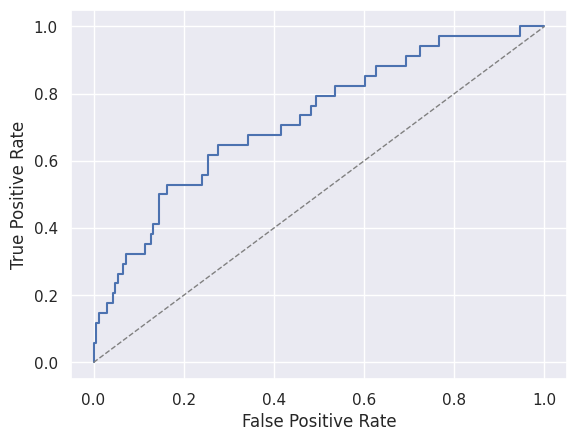

In [ ]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()